In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

데이터 불러오기

In [25]:
#import train and test CSV files
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

#take a look at the training data
#train.describe(include="all")
train.head()
#Pclass - 우등석
#Survived - 이놈 맞추기
#Sex - 성별
#SibSp - 형제/배우자 있음?
#Parch - 부모/자식 있음?
#Cabin - 객실 있음? 없음?
#Embarked - 어느 항구에서 출항함?


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [27]:

# 뭘 뺄까 =['Name','Age','Ticket','Cabin','PassengerId']

sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)
drop_lists=['Name','Age','Ticket','Cabin','PassengerId']
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mean())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())


print(pd.isnull(train).sum())
print('='*50)
print(pd.isnull(test).sum())

train.head()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0


In [28]:
train.shape

(891, 12)

In [29]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,2.0


In [30]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,3
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,2
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,1


In [31]:
# X, y 설정
train_X = train[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]
train_y = train[['PassengerId','Survived']]

# 테스트 데이터 준비
test_X = test[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [32]:
#필요없는 데이터 날리고
train = train.drop('Survived', axis = 1)
train = train.drop(drop_lists, axis = 1)
test = test.drop(drop_lists, axis = 1)

In [33]:
test

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,0,0,7.8292,3
1,3,1,1,0,7.0000,1
2,2,0,0,0,9.6875,3
3,3,0,0,0,8.6625,1
4,3,1,1,1,12.2875,1
...,...,...,...,...,...,...
413,3,0,0,0,8.0500,1
414,1,1,0,0,108.9000,2
415,3,0,0,0,7.2500,1
416,3,0,0,0,8.0500,1


In [34]:
train_y

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,0
889,890,1


In [35]:
#테스트 데이터에 Survival- y값이 없어서 train 데이터 쪼게기,,
train_X = train_X[:-292]
train_y = train_y[:-292]

val_X = train_X[-293:-101]
val_y = train_y[-293:-101]


test_X = train_X[-100:]
test_y = train_y[-100:]

In [36]:
test

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,0,0,7.8292,3
1,3,1,1,0,7.0000,1
2,2,0,0,0,9.6875,3
3,3,0,0,0,8.6625,1
4,3,1,1,1,12.2875,1
...,...,...,...,...,...,...
413,3,0,0,0,8.0500,1
414,1,1,0,0,108.9000,2
415,3,0,0,0,7.2500,1
416,3,0,0,0,8.0500,1


In [37]:
import torch.nn as nn
cls_loss = nn.CrossEntropyLoss()

In [38]:
import torch
import torch.optim as optim
from sklearn.metrics import accuracy_score


class MLPModel(nn.Module):
    def __init__(self): 
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=6, out_features=200)
        self.linear2 = nn.Linear(in_features=200, out_features=200)
        self.linear3 = nn.Linear(in_features=200, out_features=2)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        return x


cls_loss = nn.CrossEntropyLoss()


model = MLPModel()
print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))


lr = 0.005
optimizer = optim.SGD(model.parameters(), lr=lr)


list_epoch = []
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []

train_X = torch.FloatTensor(train_X.values)
train_y = torch.LongTensor(train_y['Survived'].values)

val_X = torch.FloatTensor(val_X.values)
val_y = torch.LongTensor(val_y['Survived'].values)


42002 parameters


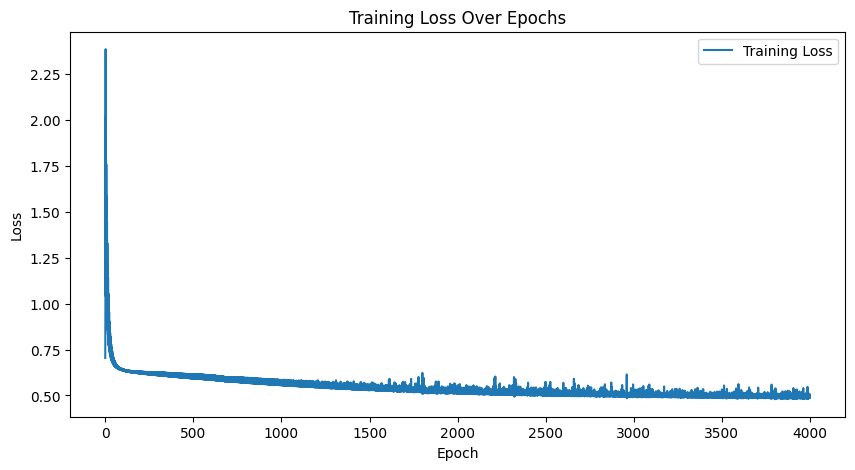

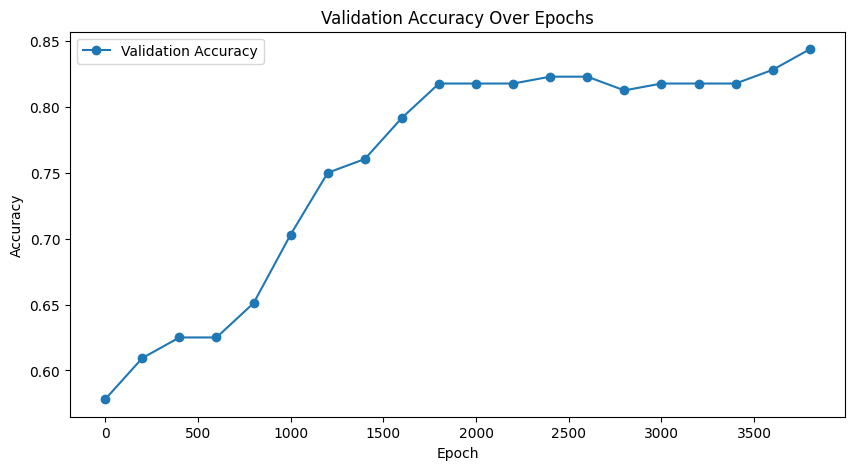

In [39]:

epoch = 4000
for i in range(epoch):
    # ====== Train ====== #
    model.train()  # train 모드로 설정
    optimizer.zero_grad()  # 그라디언트 초기화
    pred_y = model(train_X)
    
    # 손실 계산
    loss = cls_loss(pred_y, train_y)
    loss.backward()  # Backpropagation
    optimizer.step()  # 파라미터 업데이트

    # 손실 기록
    list_epoch.append(i)
    list_train_loss.append(loss.item())

    # ====== Validation ====== #
    if i % 200 == 0:  # 200회의 학습마다 검증 수행
        model.eval()  # 평가 모드 설정
        with torch.no_grad():
            # Forward pass
            val_pred_y = model(val_X)
            val_loss = cls_loss(val_pred_y, val_y)
            list_val_loss.append(val_loss.item())

            # ====== Evaluation ====== #
            val_pred_labels = val_pred_y.argmax(dim=1).numpy() 
            val_true_labels = val_y.numpy()

            acc = accuracy_score(val_true_labels, val_pred_labels)
            list_acc.append(acc)
            list_acc_epoch.append(i)

plt.figure(figsize=(10, 5))
plt.plot(list_epoch, list_train_loss, label="Training Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list_acc_epoch, list_acc, label="Validation Accuracy", marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.legend()
plt.show()




# validation_loss

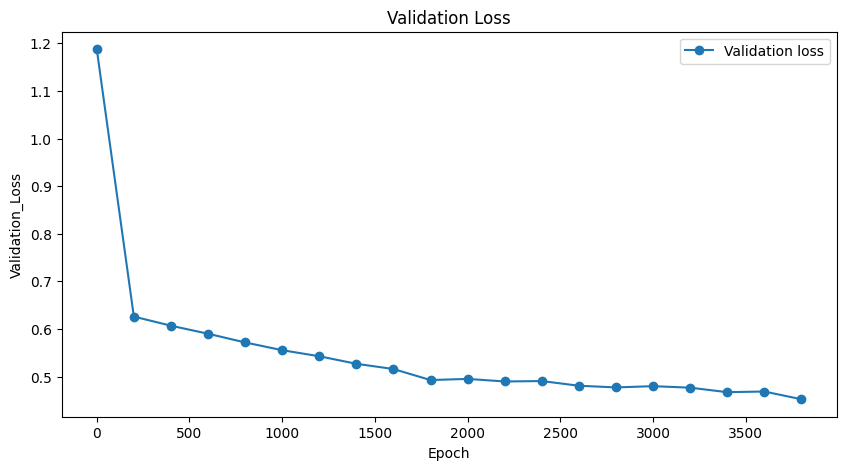

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(list_acc_epoch, list_val_loss, label="Validation loss", marker='o')
plt.xlabel('Epoch')
plt.ylabel('Validation_Loss')
plt.title('Validation Loss')
plt.legend()
plt.show()

In [ ]:
val_pred_labels

In [41]:
list_val_loss

[1.1875821352005005,
 0.6259897351264954,
 0.6068280339241028,
 0.5900096297264099,
 0.5716906189918518,
 0.555411159992218,
 0.5426575541496277,
 0.5268402695655823,
 0.5158725380897522,
 0.49268031120300293,
 0.49507343769073486,
 0.48970332741737366,
 0.49052926898002625,
 0.48078152537345886,
 0.47720277309417725,
 0.4798140525817871,
 0.4767015874385834,
 0.46721693873405457,
 0.46862053871154785,
 0.45241308212280273]